# Setup

In [4]:
# Dependencies
# Import Matplot lib and use the `nbagg` backend
### BEGIN SOLUTION
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
from sqlalchemy import Column, Integer, Float, Date, String, ForeignKey
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy.orm import Session
from sqlalchemy import Index
from sqlalchemy import MetaData
from sqlalchemy import Table
import csv
import pandas as pd


In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Import Dependencies
### BEGIN SOLUTION
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
### END SOLUTION

# Explore Database

In [7]:
engine = create_engine("sqlite:///hawaii_3.db")

In [8]:
inspector = inspect(engine) 
inspector.get_table_names()

['measurement_table', 'sqlite_sequence', 'station_table']

In [9]:
columns = inspector.get_columns('measurement_table')

for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR
date DATE
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station_table')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(225)
station_name VARCHAR(225)
latitude FLOAT
longitude FLOAT
elevation FLOAT
location VARCHAR(225)


# Reflect database and Query

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement_table', 'station_table']

In [12]:
Measurement=Base.classes.measurement_table

In [13]:
Station=Base.classes.station_table

In [14]:
mapper = inspect(Measurement)
print(mapper)

Mapper|measurement_table|measurement_table


In [15]:
mapper = inspect(Station)
print(mapper)

Mapper|station_table|station_table


In [16]:
Session = sessionmaker(bind=engine)
# Session is a class
session = Session()
# now session is a instance of the class Session

In [17]:
engine.execute('SELECT * FROM measurement_table LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0)]

In [18]:
engine.execute('SELECT * FROM station_table LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 'POINT(21.2716 -157.8168)'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 'POINT(21.4234 -157.8015)'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 'POINT(21.5213 -157.8374)'),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 'POINT(21.3934 -157.9751)'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 'POINT(21.4992 -158.0111)')]

# Precipitation Analysis

In [19]:
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
last_12_months_of_precipitation_data=prcp_results
last_12_months_of_precipitation_data


[(datetime.date(2016, 8, 1), 0.08),
 (datetime.date(2016, 8, 2), 0.05),
 (datetime.date(2016, 8, 3), 0.0),
 (datetime.date(2016, 8, 4), 0.04),
 (datetime.date(2016, 8, 5), 0.01),
 (datetime.date(2016, 8, 6), 0.0),
 (datetime.date(2016, 8, 7), 0.39),
 (datetime.date(2016, 8, 8), 0.02),
 (datetime.date(2016, 8, 9), 0.0),
 (datetime.date(2016, 8, 10), 0.0),
 (datetime.date(2016, 8, 11), 0.0),
 (datetime.date(2016, 8, 12), 0.0),
 (datetime.date(2016, 8, 13), 0.0),
 (datetime.date(2016, 8, 14), 0.0),
 (datetime.date(2016, 8, 15), 0.0),
 (datetime.date(2016, 8, 16), 0.0),
 (datetime.date(2016, 8, 17), 0.0),
 (datetime.date(2016, 8, 18), 0.0),
 (datetime.date(2016, 8, 19), 0.04),
 (datetime.date(2016, 8, 20), 0.0),
 (datetime.date(2016, 8, 21), 0.12),
 (datetime.date(2016, 8, 22), 0.4),
 (datetime.date(2016, 8, 23), 0.0),
 (datetime.date(2016, 8, 24), 0.08),
 (datetime.date(2016, 8, 25), 0.08),
 (datetime.date(2016, 8, 26), 0.0),
 (datetime.date(2016, 8, 27), 0.0),
 (datetime.date(2016, 8, 28

In [20]:

date = [prcp_results[0] for prcp_result in prcp_results[0:]]
prcp= [prcp_results[1] for prcp_result in prcp_results[0:]]
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.set_index('date', inplace=True, )
prcp_df.head(5)

,prcp
date,
2016-08-01,0.08
2016-08-02,0.05
2016-08-03,0.00
2016-08-04,0.04
2016-08-05,0.01


In [21]:
#from datetime import datetime as DateTime, timedelta as TimeDelta
#dates =[ datetime.date(2016, 8, 1) + TimeDelta(days=i) for i in range(30,360,30) ]
prcp_list = prcp_df["prcp"].tolist()


<IPython.core.display.Javascript object>


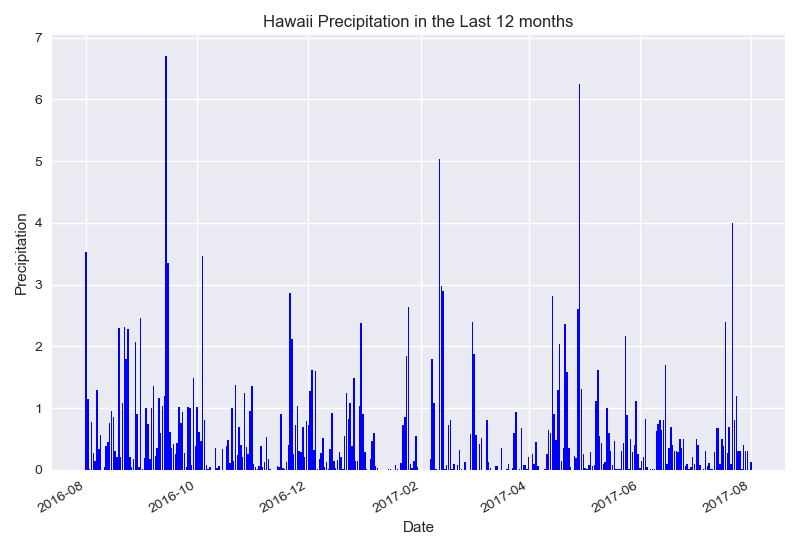

In [22]:
fig, ax = plt.subplots()
ax.bar(prcp_df.index.get_values(), prcp_list,color='b',align='center', label="Precipitation")
ax.xaxis_date()
fig.autofmt_xdate()
plt.title('Hawaii Precipitation in the Last 12 months')
plt.xlabel('Date')
plt.ylabel("Precipitation")
plt.tight_layout()
plt.show()
fig.savefig('Hawaii Precipitation in the Last 12 months.png', dpi=fig.dpi)

In [23]:
prcp_df= pd.DataFrame(prcp_results[0:], columns=['date', 'prcp'] )
prcp_df.head(5)

,date,prcp
0,2016-08-01,0.08
1,2016-08-02,0.05
2,2016-08-03,0.00
3,2016-08-04,0.04
4,2016-08-05,0.01


In [24]:
prcp_df.describe()

,prcp
count,14490.000000
mean,0.187353
std,0.474752
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


# Station Analysis

In [25]:

total_number_of_stations = session.query(Measurement.station).distinct(Measurement.station).count()
print("Total number of stations is "+ str(total_number_of_stations))

Total number of stations is 9


In [26]:
Desc_active_stations = session.query(Measurement.station, func.count(Measurement.prcp)).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
Desc_active_stations
  

[('USC00519281', 19404),
 ('USC00513117', 18872),
 ('USC00519397', 18795),
 ('USC00519523', 18004),
 ('USC00516128', 17388),
 ('USC00514830', 13559),
 ('USC00511918', 13524),
 ('USC00517948', 4781),
 ('USC00518838', 2394)]

In [27]:
Most_active_stations = session.query(Measurement.station).\
                                     group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).limit(1).scalar()
print ( "Station which has the highest number of observations is  " + str(Most_active_stations))
  

Station which has the highest number of observations is  USC00519281


In [28]:
tobs_results = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
tobs_results

[('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 78.0),
 ('USC00519397', 80.0),
 ('USC00519397', 77.0),
 ('USC00519397', 80.0),
 ('USC00519397', 76.0),
 ('USC00519397', 77.0),
 ('USC00519397', 81.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 77.0),
 ('USC00519397', 78.0),
 ('USC00519397', 78.0),
 ('USC00519397', 79.0),
 ('USC00519397', 80.0),
 ('USC00519397', 81.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 75.0),
 ('USC00519397', 76.0),
 ('USC00519397', 80.0),
 ('USC00519397', 79.0),
 ('USC00519397', 78.0),
 ('USC00519397', 76.0),
 ('USC00519397', 78.0),
 ('USC00519397',

In [29]:
Most_active_stations_tobs_results = session.query(Measurement.station, Measurement.tobs).\
                                   filter(Measurement.date.between('2016-08-01', '2017-08-01')).\
                                   filter(Measurement.station == Most_active_stations).all()
Most_active_stations_tobs_results

[('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 81.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 75.0),
 ('USC00519281', 74.0),
 ('USC00519281', 82.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 81.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281',

In [30]:
Most_active_stations_temp = [result[1] for result in Most_active_stations_tobs_results[0:]]

<IPython.core.display.Javascript object>


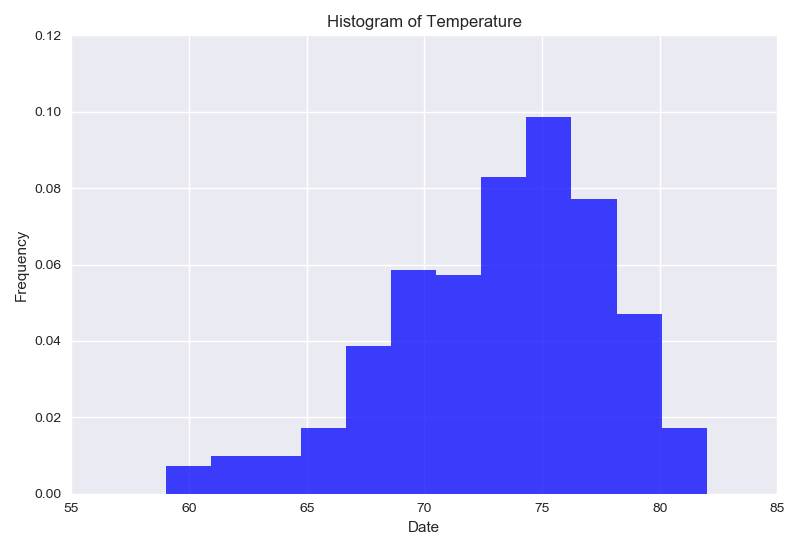

In [31]:
fig, ax = plt.subplots()
plt.hist(Most_active_stations_temp, bins = 12, align='mid', label="tobs", alpha=0.75, normed=1,color="b")
plt.title('Last Year Temperature at Station USC00519281')
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.axis([55, 85, 0, 0.12])
plt.title('Histogram of Temperature')
fig.tight_layout()
plt.show()
fig.savefig('Histogram of Temperature.png', dpi=fig.dpi)

# Temperature Analysis

In [32]:
Temp=[]
start_date='2016-08-01'
end_date='2017-08-01'
def calc_temps(start_date, end_date):
    results=session.query(func.max(Measurement.tobs).label("max_tobs"), \
                          func.min(Measurement.tobs).label("min_tobs"),\
                          func.avg(Measurement.tobs).label("avg_tobs")).\
                          filter(Measurement.date.between(start_date , end_date))  
    res = results.one()
    res
    TMAX = res.max_tobs
    TMIN= res.min_tobs
    TAVG= res.avg_tobs
    Temp.append(TMAX)
    Temp.append(TMIN)
    Temp.append(TAVG)
    #print(str(TMAX))
    #print(str(TMIN))
    #print(str(TAVG))
calc_temps(start_date, end_date)
Temp

[87.0, 58.0, 74.54879227053141]

In [33]:
TAVG=Temp[2]
TMIN=Temp[1]
TMAX=Temp[0]

<IPython.core.display.Javascript object>


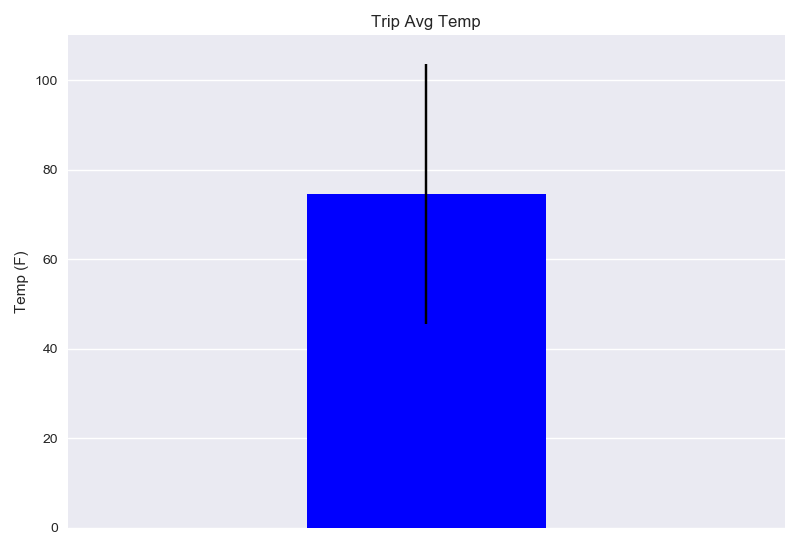

In [34]:
fig = plt.figure()
plt.bar( 1,TAVG, color = 'blue', yerr = TMAX-TMIN, align='center')
plt.xlim(-0.2, 2.2)
plt.ylim([0, 110])
plt.axes().get_xaxis().set_visible(False)
plt.title('Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.show()
fig.savefig('Trip Avg Temp.png', dpi=fig.dpi)

# Optional Recommended Analysis

In [55]:
Rainfall_results = session.query(Measurement.station, func.count(Measurement.prcp)).\
                   group_by(Measurement.station).filter(Measurement.date.between('2016-08-01', '2017-08-01')).all()
Rainfall_results

[('USC00513117', 2555),
 ('USC00514830', 1827),
 ('USC00516128', 2317),
 ('USC00517948', 469),
 ('USC00519281', 2555),
 ('USC00519397', 2527),
 ('USC00519523', 2240)]

In [56]:
for i in range(1,16):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [57]:
from sqlalchemy import extract  
trip_month=8
trip_days=range(1, 16)
for i in range(1, 16):
    subquery=session.query(Measurement.date).filter(extract('month', Measurement.date)==trip_month).\
             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date).all()
subquery

[(datetime.date(2010, 8, 15)),
 (datetime.date(2011, 8, 15)),
 (datetime.date(2012, 8, 15)),
 (datetime.date(2013, 8, 15)),
 (datetime.date(2014, 8, 15)),
 (datetime.date(2015, 8, 15)),
 (datetime.date(2016, 8, 15)),
 (datetime.date(2017, 8, 15))]

In [58]:
dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month=8
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(Measurement.date.label("dates"), func.max(Measurement.tobs).label("max_tobs"),\
                             func.min(Measurement.tobs).label("min_tobs"),func.avg(Measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', Measurement.date)==trip_month).\
                             filter(extract('day', Measurement.date)== i ).group_by(Measurement.date).order_by(Measurement.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()


(datetime.date(2010, 8, 1), 77.0, 71.0, 73.42857142857143)
(datetime.date(2011, 8, 1), 78.0, 67.0, 73.28571428571429)
(datetime.date(2012, 8, 1), 79.0, 71.0, 75.85714285714286)
(datetime.date(2013, 8, 1), 79.0, 75.0, 76.83333333333333)
(datetime.date(2014, 8, 1), 83.0, 73.0, 77.42857142857143)
(datetime.date(2015, 8, 1), 79.0, 73.0, 77.4)
(datetime.date(2016, 8, 1), 77.0, 73.0, 75.8)
(datetime.date(2017, 8, 1), 77.0, 74.0, 75.33333333333333)
(datetime.date(2010, 8, 2), 76.0, 70.0, 72.875)
(datetime.date(2011, 8, 2), 77.0, 70.0, 73.57142857142857)
(datetime.date(2012, 8, 2), 78.0, 68.0, 73.5)
(datetime.date(2013, 8, 2), 78.0, 72.0, 75.33333333333333)
(datetime.date(2014, 8, 2), 81.0, 73.0, 77.71428571428571)
(datetime.date(2015, 8, 2), 84.0, 76.0, 80.0)
(datetime.date(2016, 8, 2), 80.0, 72.0, 76.57142857142857)
(datetime.date(2017, 8, 2), 83.0, 73.0, 79.0)
(datetime.date(2010, 8, 3), 77.0, 70.0, 73.11111111111111)
(datetime.date(2011, 8, 3), 78.0, 71.0, 75.25)
(datetime.date(2012, 8, 3)

In [59]:
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TAVG,TMAX,TMIN
Date,,,
2017-08-01,75.333333,77.0,74.0
2017-08-02,79.000000,83.0,73.0
2017-08-03,79.000000,81.0,76.0
2017-08-04,80.000000,82.0,77.0
2017-08-05,81.500000,82.0,81.0


<IPython.core.display.Javascript object>


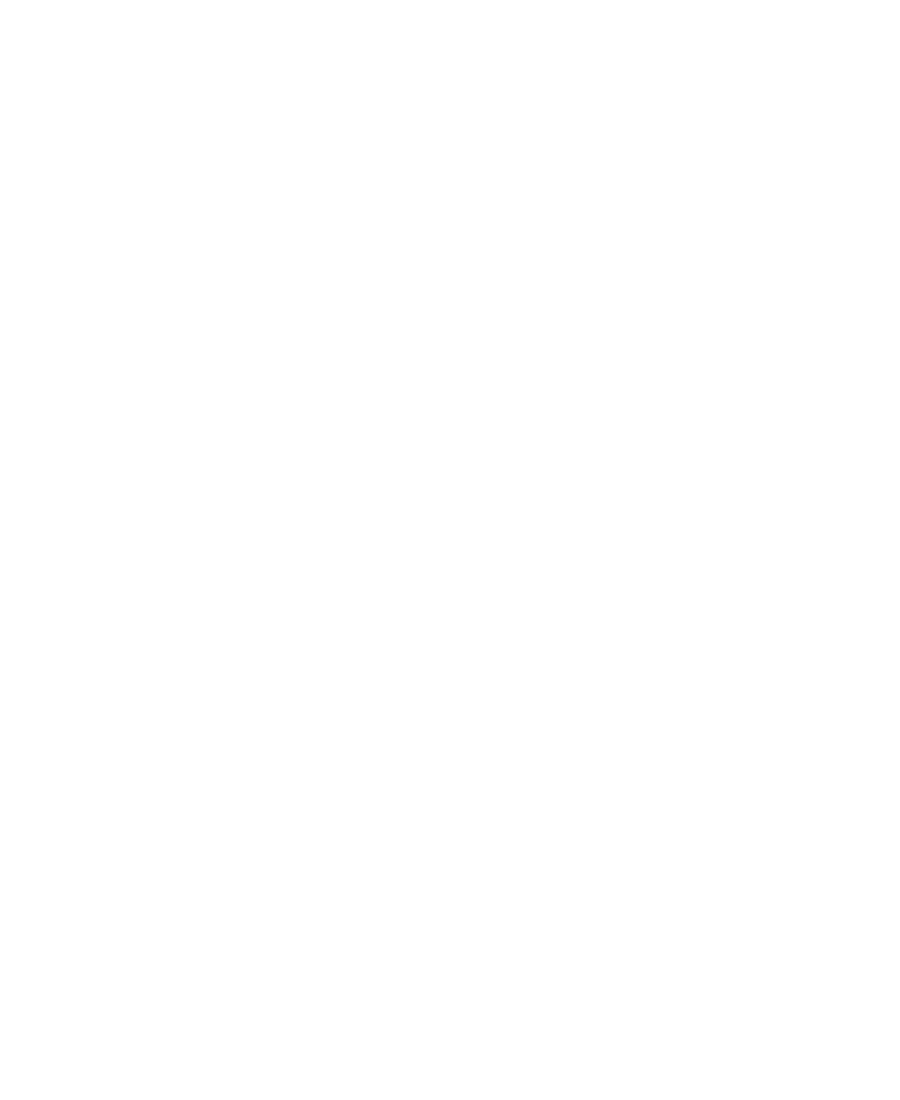

<IPython.core.display.Javascript object>


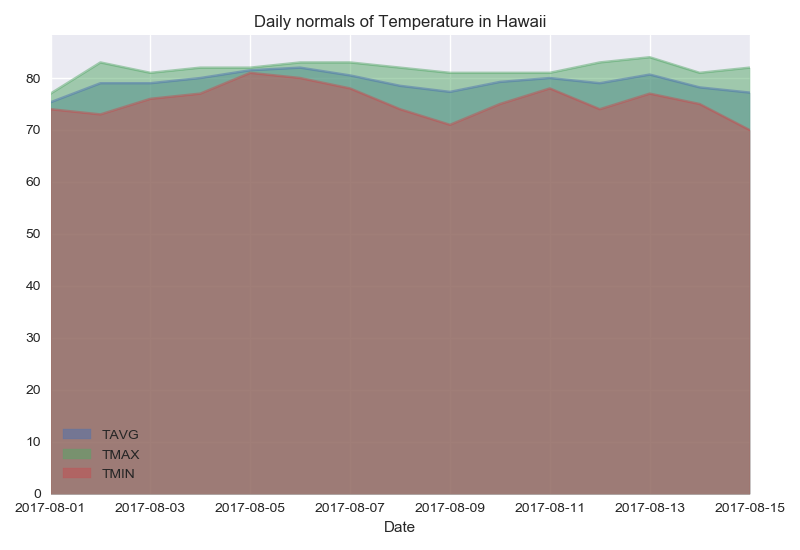

In [60]:
fig = plt.figure(figsize=(9, 11))
ax = Daily_normals_df.plot(kind='area', stacked=False, title='Daily normals of Temperature in Hawaii')
ax.set_xlabel('Date')
plt.tight_layout()
plt.savefig('Daily normals of Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()